# 1일차 Review : 같은 문제 다시 풀어보기

    학습은 10번으로!

In [68]:
from sklearn.datasets import load_iris

In [69]:
iris = load_iris()

In [70]:
x = iris.data
y = iris.target

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=2022)

In [72]:
x_train.shape, y_train.shape

((120, 4), (120,))

In [73]:
#####################
# 라이브러리 불러오기
#####################
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import *

In [74]:
#######################
# 어떤 전처리 작업 필요
# Hint : y.shape
#######################
from tensorflow.keras.utils import to_categorical

y_len = len(set(y_train))
y_train = to_categorical(y_train, y_len)
y_test = to_categorical(y_test, y_len)

In [75]:
########
# 모델링 (Sequential)
########
keras.backend.clear_session()

model = keras.models.Sequential()

model.add(keras.layers.Input(shape=(4,)))
model.add(keras.layers.Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


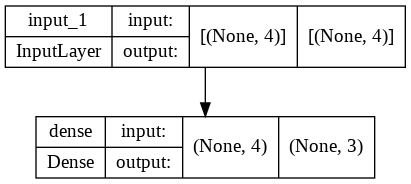

In [76]:
model.summary()
tf.keras.utils.plot_model(model, show_shapes=True)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 4)]               0         
                                                                 
 softmax_layer (Dense)       (None, 3)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


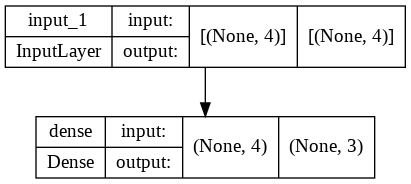

In [77]:
########
# 모델링 (Sequential)
########
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.activations import softmax

clear_session()

a = Input(shape=(4,), name='input_layer')
b = Dense(3, softmax, name='softmax_layer')(a)

model2 = Model(a,b)

model2.compile(loss=categorical_crossentropy, metrics=['accuracy'], optimizer='adam')

model2.summary()
tf.keras.utils.plot_model(model, show_shapes=True)

In [78]:
###########
# 모델 학습
###########
model.fit(x_train, y_train, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
3/3 [==============================] - 1s 93ms/step - loss: 3.2850 - accuracy: 0.0000e+00 - val_loss: 3.3374 - val_accuracy: 0.0000e+00
Epoch 2/10
3/3 [==============================] - 0s 15ms/step - loss: 3.2467 - accuracy: 0.0000e+00 - val_loss: 3.3081 - val_accuracy: 0.0000e+00
Epoch 3/10
3/3 [==============================] - 0s 14ms/step - loss: 3.2118 - accuracy: 0.0000e+00 - val_loss: 3.2803 - val_accuracy: 0.0000e+00
Epoch 4/10
3/3 [==============================] - 0s 17ms/step - loss: 3.1759 - accuracy: 0.0000e+00 - val_loss: 3.2524 - val_accuracy: 0.0000e+00
Epoch 5/10
3/3 [==============================] - 0s 13ms/step - loss: 3.1386 - accuracy: 0.0000e+00 - val_loss: 3.2241 - val_accuracy: 0.0000e+00
Epoch 6/10
3/3 [==============================] - 0s 13ms/step - loss: 3.1052 - accuracy: 0.0000e+00 - val_loss: 3.1960 - val_accuracy: 0.0000e+00
Epoch 7/10
3/3 [==============================] - 0s 14ms/step - loss: 3.0706 - accuracy: 0.0000e+00 - val_loss: 3.167

In [79]:
model2.fit(x_train, y_train, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
3/3 [==============================] - 1s 90ms/step - loss: 8.1920 - accuracy: 0.3438 - val_loss: 6.7883 - val_accuracy: 0.3750
Epoch 2/10
3/3 [==============================] - 0s 14ms/step - loss: 8.1362 - accuracy: 0.3438 - val_loss: 6.7368 - val_accuracy: 0.3750
Epoch 3/10
3/3 [==============================] - 0s 15ms/step - loss: 8.0805 - accuracy: 0.3438 - val_loss: 6.6856 - val_accuracy: 0.3750
Epoch 4/10
3/3 [==============================] - 0s 14ms/step - loss: 8.0212 - accuracy: 0.3438 - val_loss: 6.6347 - val_accuracy: 0.3750
Epoch 5/10
3/3 [==============================] - 0s 16ms/step - loss: 7.9665 - accuracy: 0.3438 - val_loss: 6.5836 - val_accuracy: 0.3750
Epoch 6/10
3/3 [==============================] - 0s 14ms/step - loss: 7.9094 - accuracy: 0.3438 - val_loss: 6.5326 - val_accuracy: 0.3750
Epoch 7/10
3/3 [==============================] - 0s 13ms/step - loss: 7.8548 - accuracy: 0.3438 - val_loss: 6.4813 - val_accuracy: 0.3750
Epoch 8/10
3/3 [===========

In [80]:
###########
# 모델 예측
###########
y_pred1 = model.predict(x_test)
y_pred1[:5]

array([[7.8410721e-01, 1.5854354e-03, 2.1430734e-01],
       [8.6409414e-01, 5.6539732e-04, 1.3534044e-01],
       [2.2658311e-01, 1.5233932e-02, 7.5818294e-01],
       [7.6540613e-01, 1.5802159e-03, 2.3301357e-01],
       [1.5314838e-01, 1.0961848e-02, 8.3588982e-01]], dtype=float32)

In [81]:
y_pred1[:5].argmax(axis=1)

array([0, 0, 2, 0, 2])

In [85]:
y_test[:5]

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

# 히든 레이어 추가하여 모델링! (Functional API)

    히든 레이어 2개를 추가하여 다시 모델링!
    히든 레이어 노드 수 : 32
    히든 레이어 activation = 'relu'

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 4)]               0         
                                                                 
 hidden_layer1 (Dense)       (None, 32)                160       
                                                                 
 hidden_layer2 (Dense)       (None, 32)                1056      
                                                                 
 softmax_layer (Dense)       (None, 3)                 99        
                                                                 
Total params: 1,315
Trainable params: 1,315
Non-trainable params: 0
_________________________________________________________________


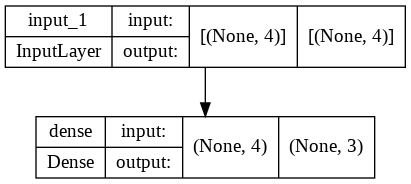

In [96]:
########
# 모델링
########
clear_session()

a = Input(shape=(4,), name='input_layer')
h = Dense(32, activation='relu', name='hidden_layer1')(a)
h = Dense(32, activation='relu', name='hidden_layer2')(h)
b = Dense(3, softmax, name='softmax_layer')(h)

model3 = Model(a,b)

model3.compile(loss=categorical_crossentropy, metrics=['accuracy'], optimizer='adam')

model3.summary()
tf.keras.utils.plot_model(model, show_shapes=True)

In [97]:
## Early Stopping
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',         # 관찰 대상
                   min_delta=0,                # 0일 경우 최소한 나빠지지만 않으면 괜찮다는 의미
                   patience=3,                 # monitor가 개선되지 않는 경우를 참는 횟수
                   verbose=1,                  # Early Stopping 된 것을 보여줌
                   restore_best_weights=True)  # 최적의 학습 가중치를 모델에 전달

In [98]:
###########
# 모델 학습
###########
hist = model3.fit(x_train, y_train, epochs=500, verbose=1, validation_split=0.2, callbacks=[es])

Epoch 1/500
3/3 [==============================] - 1s 185ms/step - loss: 2.2006 - accuracy: 0.3229 - val_loss: 1.8062 - val_accuracy: 0.4167
Epoch 2/500
3/3 [==============================] - 0s 32ms/step - loss: 1.8938 - accuracy: 0.3229 - val_loss: 1.5863 - val_accuracy: 0.4167
Epoch 3/500
3/3 [==============================] - 0s 48ms/step - loss: 1.6355 - accuracy: 0.3229 - val_loss: 1.4129 - val_accuracy: 0.4167
Epoch 4/500
3/3 [==============================] - 0s 33ms/step - loss: 1.4343 - accuracy: 0.3229 - val_loss: 1.2759 - val_accuracy: 0.4167
Epoch 5/500
3/3 [==============================] - 0s 32ms/step - loss: 1.2704 - accuracy: 0.3229 - val_loss: 1.1808 - val_accuracy: 0.4167
Epoch 6/500
3/3 [==============================] - 0s 56ms/step - loss: 1.1553 - accuracy: 0.4062 - val_loss: 1.1187 - val_accuracy: 0.6250
Epoch 7/500
3/3 [==============================] - 0s 35ms/step - loss: 1.0836 - accuracy: 0.6458 - val_loss: 1.0752 - val_accuracy: 0.5417
Epoch 8/500
3/3 [==

In [100]:
###########
# 모델 예측
###########
y_pred3 = model3.predict(x_test)
y_pred3[:3]

array([[6.9362850e-06, 2.1005180e-03, 9.9789256e-01],
       [1.4753358e-06, 1.2353001e-03, 9.9876320e-01],
       [9.9823499e-01, 1.7636747e-03, 1.3034382e-06]], dtype=float32)

In [104]:
y_pred3[:5].argmax(axis=1)

array([2, 2, 0, 2, 0])

In [105]:
y_test[:5].argmax(axis=1)

array([2, 2, 0, 2, 0])

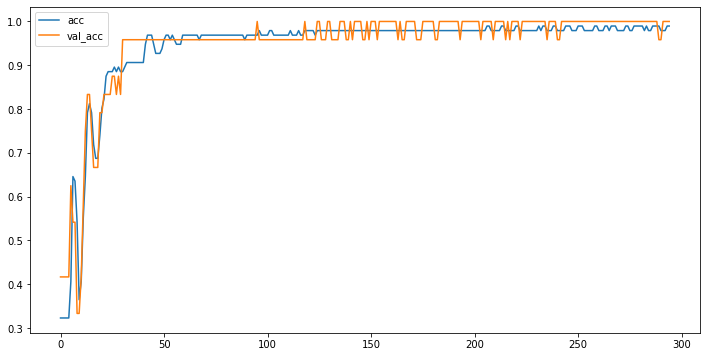

In [108]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(hist.history['accuracy'], label='acc')
plt.plot(hist.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()